In [244]:
'''
Linear Regression: To predict scores for optimal curve fitting iterations.
dataset: Cardekho car pricing
purpose: predict car prices, factoring age and other important features.
DS source: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho/tasks?taskId=1420
'''
##############################
# Author: AP
# Imports below
##############################


from sklearn import datasets,linear_model
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as ny
import pandas as ps
import seaborn as sn

%matplotlib inline

# Step 1: Loading and examining data set

In [245]:

# How does the data look like ?

cardf = ps.read_csv(r"C:\Users\140115\PycharmProjects\MachLearn2021\datasets\Car_details_v3.csv")
#cardf.head()

print(cardf.shape, cardf.columns)

print("\n ******************************* \n ")

print(cardf.describe(), cardf.info())

print("\n ******************************* \n ")

print(cardf.isna().sum()) # Has about 220 null valued rows.

cardf1 = cardf.dropna(axis=0) # dropping them

print(cardf1.shape)

(8128, 13) Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

 ******************************* 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
name             8128 non-null object
year             8128 non-null int64
selling_price    8128 non-null int64
km_driven        8128 non-null int64
fuel             8128 non-null object
seller_type      8128 non-null object
transmission     8128 non-null object
owner            8128 non-null object
mileage          7907 non-null object
engine           7907 non-null object
max_power        7913 non-null object
torque           7906 non-null object
seats            7907 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.

In [246]:
# Checking columns for categorical values that need conversion.

cardf1.head(10)

cardf1 = cardf1.drop_duplicates()

# Transmission, Fuel type, Owner need numerical conversion.
# seller type, engine, torque, name and max power can be dropped ? The others can be encoded.

In [247]:
cardf2 = cardf1.drop(columns=['seller_type','name','torque','max_power','mileage','seats','engine'],axis=1)

print("\n ******************************* \n ")

#converting year to age against 2021
cardf2['age'] = 2021 - cardf2['year']

cardf2.head(10)


 ******************************* 
 


,year,selling_price,km_driven,fuel,transmission,owner,age
0,2014,450000,145500,Diesel,Manual,First Owner,7
1,2014,370000,120000,Diesel,Manual,Second Owner,7
2,2006,158000,140000,Petrol,Manual,Third Owner,15
3,2010,225000,127000,Diesel,Manual,First Owner,11
4,2007,130000,120000,Petrol,Manual,First Owner,14
5,2017,440000,45000,Petrol,Manual,First Owner,4
6,2007,96000,175000,LPG,Manual,First Owner,14
7,2001,45000,5000,Petrol,Manual,Second Owner,20
8,2011,350000,90000,Diesel,Manual,First Owner,10
9,2013,200000,169000,Diesel,Manual,First Owner,8


In [248]:

# Getting dummies/ encoded features


cardf3 = ps.get_dummies(cardf2,drop_first=True)
cardf3.drop(columns=['fuel_LPG','owner_Fourth & Above Owner'])
cardf3.head(10)

,year,selling_price,km_driven,age,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,7,1,0,0,1,0,0,0,0
1,2014,370000,120000,7,1,0,0,1,0,1,0,0
2,2006,158000,140000,15,0,0,1,1,0,0,0,1
3,2010,225000,127000,11,1,0,0,1,0,0,0,0
4,2007,130000,120000,14,0,0,1,1,0,0,0,0
5,2017,440000,45000,4,0,0,1,1,0,0,0,0
6,2007,96000,175000,14,0,1,0,1,0,0,0,0
7,2001,45000,5000,20,0,0,1,1,0,1,0,0
8,2011,350000,90000,10,1,0,0,1,0,0,0,0
9,2013,200000,169000,8,1,0,0,1,0,0,0,0


In [249]:
# Correlation within the dataset. Factors governing prices vs columnar values

#plt.figure(figsize=(30,30))
#plt.rcParams.update({'font.size': 22})
#sn.heatmap(cardf3.corr(),annot=True)


In [250]:

# T-T-S

from sklearn.model_selection import train_test_split as tetras

X = cardf3.drop(columns=['selling_price'])
y = cardf3['selling_price']

X_train,X_test,y_train,y_test = tetras(X,y,train_size=0.8,random_state=42) #omitting random state for now.

print(X_train.shape, X_test.shape)

print("\n ******************************* \n ")

print(X_train.head())


(5373, 11) (1344, 11)

 ******************************* 
 
      year  km_driven  age  fuel_Diesel  fuel_LPG  fuel_Petrol  \
2583  2014      80000    7            0         0            1   
1428  2017      35000    4            1         0            0   
7288  2013      64000    8            1         0            0   
6851  2018      25000    3            1         0            0   
4447  2013      90000    8            1         0            0   

      transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
2583                    1                           0                   0   
1428                    1                           0                   0   
7288                    0                           0                   0   
6851                    1                           0                   0   
4447                    1                           0                   0   

      owner_Test Drive Car  owner_Third Owner  
2583                     0       

In [251]:
# Fitting the model with above state
from sklearn.linear_model import LinearRegression

car_reg_model = LinearRegression()
car_reg_model.fit(X_train,y_train)

LinearRegression()

In [252]:
curr_set = [2014,80000,7,0,0,1,1,0,0,0,0]
print(car_reg_model.predict([curr_set]))

pred_set = car_reg_model.predict(X_test)
print("\n R2 score is : ",car_reg_model.score(X_test,y_test))

from sklearn.metrics import mean_squared_error

rmse = ny.sqrt(mean_squared_error(y_test, pred_set))

print("\n Root Mean Squared Error: {}".format(rmse))

print("\n RSME is : ",car_reg_model.score(X_test,y_test))

[346982.71373926]

 R2 score is :  0.3848034245426065

 Root Mean Squared Error: 367414.0187963752

 RSME is :  0.3848034245426065


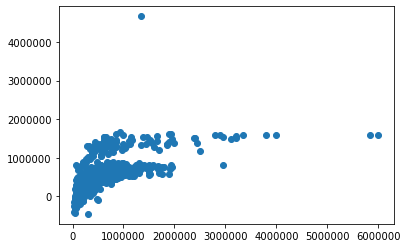

In [253]:
plt.scatter(y_test,pred_set)

#  So far, prediction score, rsme and R2 being low. To do: Need a better pre-processing, cleaning and Feature engineering.


In [254]:
# continuing with cardf1
print("\n ******************************* \n ")

vehdf1 = cardf1

print(vehdf1.describe())
print("\n seats above 8, \n ")
print(vehdf1[vehdf1['seats'] >=11.0])

#plt.hist(vehdf1['selling_price'])





 ******************************* 
 
              year  selling_price     km_driven        seats
count  6717.000000   6.717000e+03  6.717000e+03  6717.000000
mean   2013.611136   5.263860e+05  7.339834e+04     5.434271
std       3.897402   5.235504e+05  5.870328e+04     0.983805
min    1994.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.500000e+05  3.800000e+04     5.000000
50%    2014.000000   4.200000e+05  6.820300e+04     5.000000
75%    2017.000000   6.500000e+05  1.000000e+05     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

 seats above 8, 
 
                                         name  year  selling_price  km_driven  \
4575  Tata Winger Deluxe - Flat Roof (Non-AC)  2010         235000      50000   

        fuel seller_type transmission        owner     mileage   engine  \
4575  Diesel  Individual       Manual  First Owner  10.71 kmpl  1948 CC   

     max_power               torque  seats  
4575    90 bhp  190Nm@ 2000-3000rpm

In [255]:
vehdf1 = vehdf1.drop(columns=['seller_type','name','torque'],axis=1)
print("\n ******************************* \n ")
vehdf1.head()



 ******************************* 
 


,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0



 ******************************* 
 
   year  selling_price  km_driven mileage engine max_power  seats  fuel_type  \
0  2014         450000     145500    23.4   1248        74      5          1   
1  2014         370000     120000   21.14   1498    103.52      5          1   
2  2006         158000     140000    17.7   1497        78      5          3   
3  2010         225000     127000    23.0   1396        90      5          1   
4  2007         130000     120000    16.1   1298      88.2      5          3   
5  2017         440000      45000   20.14   1197     81.86      5          3   
6  2007          96000     175000    17.3   1061      57.5      5          2   
7  2001          45000       5000    16.1    796        37      4          3   
8  2011         350000      90000   23.59   1364      67.1      5          1   
9  2013         200000     169000    20.0   1399      68.1      5          1   

   tsm  ownership  age  
0    1          0    7  
1    1          2    7  
2    1 

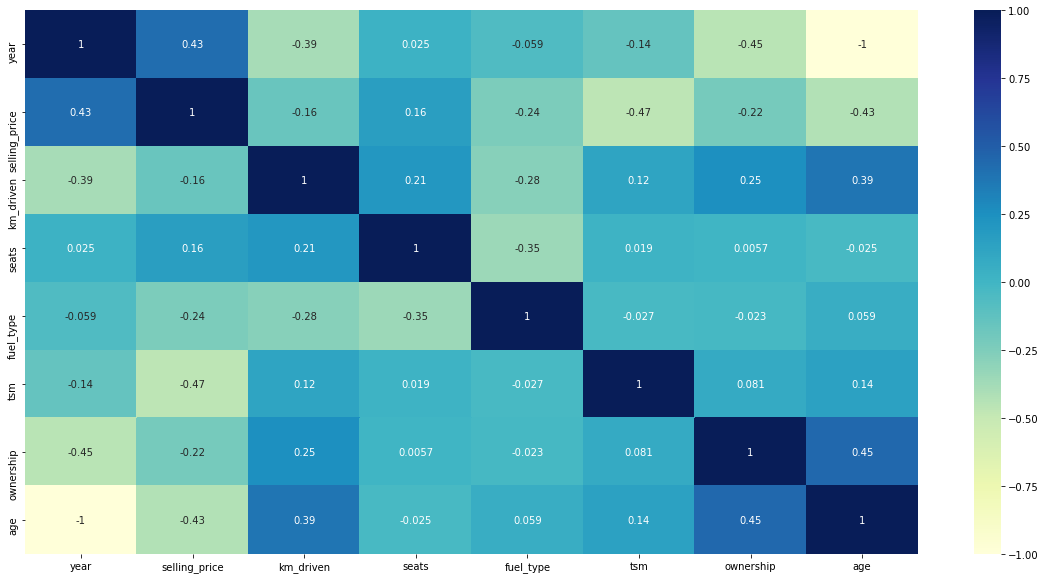

In [256]:
# Col encoding
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
vehdf1['fuel_type'] = le.fit_transform(vehdf1['fuel'])
vehdf1['tsm'] = le.fit_transform(vehdf1['transmission'])
vehdf1['ownership'] = le.fit_transform(vehdf1['owner'])

# diesel - 1, petrol- 3, lpg-2
# manual - 1, auto -2
# ownsership: 1st - 0, 2nd - 2, 3rd -4
vehdf2=vehdf1.drop(columns=['fuel','transmission','owner'],axis=1)
     


# filtering strings in cols
vehdf2['mileage'] = vehdf2['mileage'].apply(lambda x : x.split(' ')[0])
vehdf2['engine'] = vehdf2['engine'].apply(lambda x : x.split(' ')[0])
vehdf2['max_power'] = vehdf2['max_power'].apply(lambda x : x.split(' ')[0])

vehdf2['seats'] = vehdf2['seats'].apply(lambda x : int(x))
#vehdf2['max_power'] = vehdf2['max_power'].apply(lambda x : round(int(x)))
vehdf2['age'] = 2021 - vehdf2['year']
print("\n ******************************* \n ")

print(vehdf2.head(10))


print("\n ******************************* \n ")

# checking co-relation
vc = vehdf2.corr()

plt.rcParams["figure.figsize"] = (20,10)
sn.heatmap(vc,annot = True, cmap="YlGnBu")

In [257]:
# SP > year, seats

# T-T-S

from sklearn.model_selection import train_test_split as tetras

X = vehdf2.drop(columns=['selling_price','year'])
y = vehdf2['selling_price']

X_train,X_test,y_train,y_test = tetras(X,y,train_size=0.8,random_state=42) #omitting random state for now.

print(X_train.shape, X_test.shape)

print("\n ******************************* \n ")

print(X_train.head())

from sklearn.preprocessing import MinMaxScaler

(5373, 9) (1344, 9)

 ******************************* 
 
      km_driven mileage engine max_power  seats  fuel_type  tsm  ownership  \
2583      80000    19.1   1197        82      5          3    1          0   
1428      35000   25.83   1498        99      5          1    1          0   
7288      64000   14.62   1498    113.42      5          1    0          0   
6851      25000    28.4   1248     74.02      5          1    1          0   
4447      90000    22.9   1248        74      5          1    1          0   

      age  
2583    7  
1428    4  
7288    8  
6851    3  
4447    8  


In [258]:
# Fitting the model with above state
from sklearn.linear_model import LinearRegression

veh_reg_model = LinearRegression()
veh_reg_model.fit(X_train,y_train)

LinearRegression()

In [259]:
curr_set = [35000,25.83,1498,99,5,1,1,0,4]
print(veh_reg_model.predict([curr_set]))

pred_set = veh_reg_model.predict(X_test)
print("\n R2 score is : ",veh_reg_model.score(X_test,y_test))

from sklearn.metrics import mean_squared_error

rmse = ny.sqrt(mean_squared_error(y_test, pred_set))

print("\n Root Mean Squared Error: {}".format(rmse))

[812768.65557803]

 R2 score is :  0.6545413856292218

 Root Mean Squared Error: 275325.7187648427


# ---------- So far, with label encoding : 0.654 -------------

 R2 score is :  0.6545146318463155

 Root Mean Squared Error: 275336.379755181

 RSME is :  0.6545146318463155